In [1]:
import numpy as np
import matplotlib.pyplot as plt
from package import coherence_profile as cp
from package import noise_spectra as ns
from scipy.signal import find_peaks

# Coherence Profile, $C_N(t)$, Tutorial

The coherence profile is given by:

$$
C_N(t) = e^{-\frac{1}{\pi} \int _{0}^{\infty} d\omega S(\omega) \frac{F_N(\omega, t)}{\omega^2}}
$$

Where, the filter function, $F_N(\omega,t)$, is defined by the $\pi$ pulse sequence used for dynamical decoupling. 

Frequently, the fi



1/f 1/e time:  0.6570193735178309
Lorentizian 1/e time:  1.1992253187235848


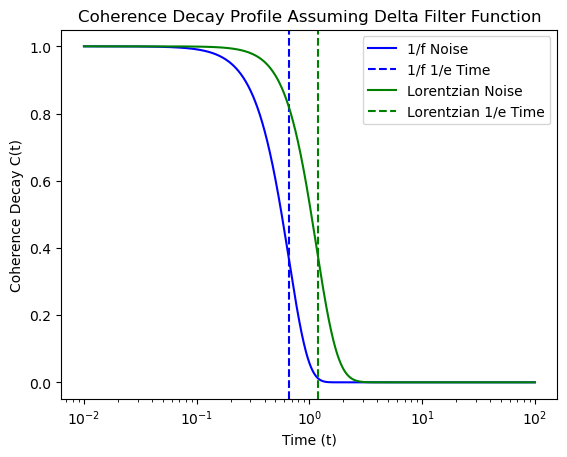

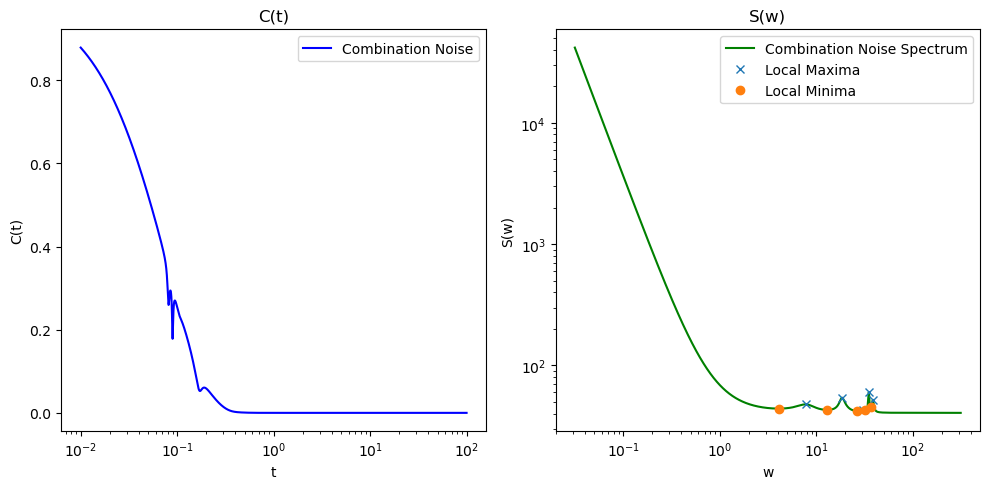

In [ ]:
# Example Usage: Coherence Decay Profile Assuming Filter Function is a Delta Function, 1/f Noise, Lorentzian Noise, and combination noise.

t = np.logspace(-2, 2, 10**5) # Time values in microseconds (µs)


c_1f = cp.coherence_decay_profile_delta(t, ns.noise_spectrum_1f(np.pi/t, A=50, alpha=1.5))
c_1f_1e = t[np.argmin(np.abs(np.array(c_1f)-1/np.e))]
print("1/f 1/e time: ", c_1f_1e)
c_lor = cp.coherence_decay_profile_delta(t, ns.noise_spectrum_lor(np.pi/t, omega_0=0, gamma=1.5, A=50))
c_lor_1e = t[np.argmin(np.abs(np.array(c_lor)-1/np.e))]
print("Lorentizian 1/e time: ", c_lor_1e)

plt.plot(t,c_1f,label='1/f Noise',color='b')
plt.axvline(c_1f_1e, color='b', linestyle='--', label='1/f 1/e Time')
plt.plot(t,c_lor,label='Lorentzian Noise',color='g')
plt.axvline(c_lor_1e, color='g', linestyle='--', label='Lorentzian 1/e Time')
plt.xlabel('Time (t)')
plt.ylabel('Coherence Decay C(t)')
plt.title('Coherence Decay Profile Assuming Delta Filter Function')
plt.xscale('log')
plt.legend()
plt.show()

num_1f = 1
A_values = np.random.uniform(low=0,high=50,size=num_1f)
alpha_values = np.random.uniform(low=0,high=3,size=num_1f)

num_lor = 7
lor_A_values = np.random.uniform(low=0,high=50,size=num_lor)
omega_0_values = np.random.uniform(low=0,high=50,size=num_lor)
gamma_values = np.random.uniform(low=0,high=3,size=num_lor)

num_C = 1
C_values = np.random.uniform(low=0,high=50,size=num_C)

    
s_w = ns.noise_spectrum_combination(np.pi/t,{'A':A_values,'alpha':alpha_values},{'omega_0':omega_0_values,'gamma':gamma_values,'A':lor_A_values},{"C":C_values},{})
c_t = cp.coherence_decay_profile_delta(t,s_w)

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot y1 in the first subplot
ax1.plot(t, c_t, label="Combination Noise", color="blue")
ax1.set_title("C(t)")
ax1.set_xlabel("t")
ax1.set_ylabel("C(t)")
ax1.set_xscale("log")
ax1.legend()

local_maxima, _ =  find_peaks(s_w)
local_minima, _ = find_peaks(-s_w)

# Plot y2 in the second subplot
ax2.plot(np.pi/t, s_w, label="Combination Noise Spectrum", color="green")
plt.plot((np.pi/t)[local_maxima], s_w[local_maxima], "x", label="Local Maxima")
plt.plot((np.pi/t)[local_minima], s_w[local_minima], "o", label="Local Minima")
ax2.set_title("S(w)")
ax2.set_xlabel("w")
ax2.set_ylabel("S(w)")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.legend()

# Display the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()